In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 41.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 8.1MB/s 
     |████████████████████████████████| 9.5MB 30.4MB/s 
     |████████████████████████████████| 2.1MB 40.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


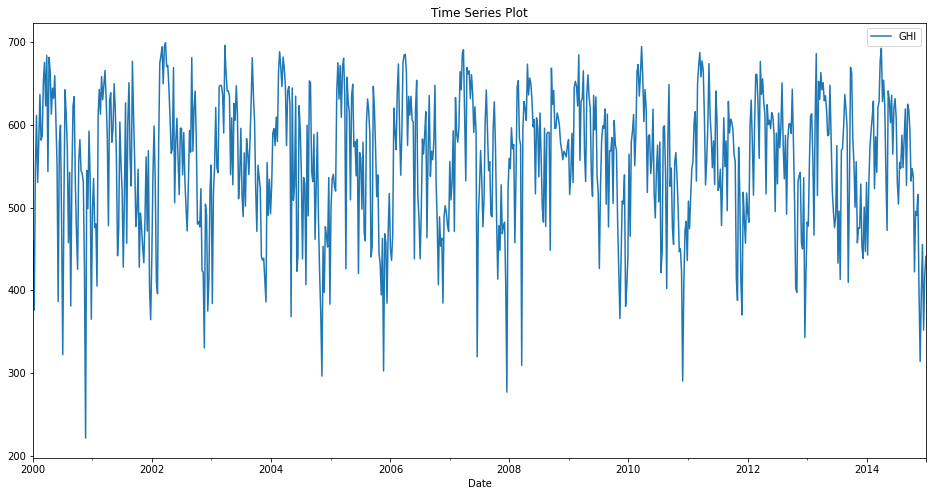

In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('W-FRI',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

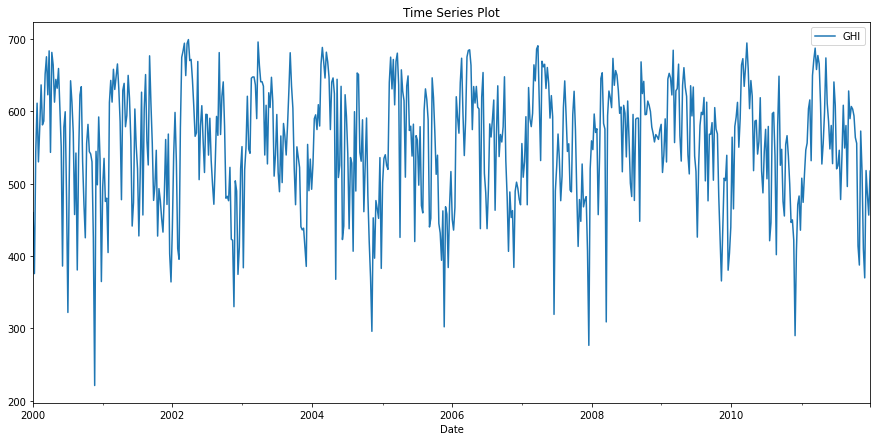

In [9]:
y[:'2011'].plot(figsize=[15,7],title='Time Series Plot')

In [10]:
X_train=y[:'2011']
X_test=y['2012':]

In [11]:
X_test

,GHI
Date,
2012-01-06,493.342857
2012-01-13,482.171429
2012-01-20,599.157143
2012-01-27,629.985714
2012-02-03,578.000000
...,...
2014-12-05,395.628571
2014-12-12,455.342857
2014-12-19,351.714286


In [12]:
np.any(np.isnan(X_train))

False

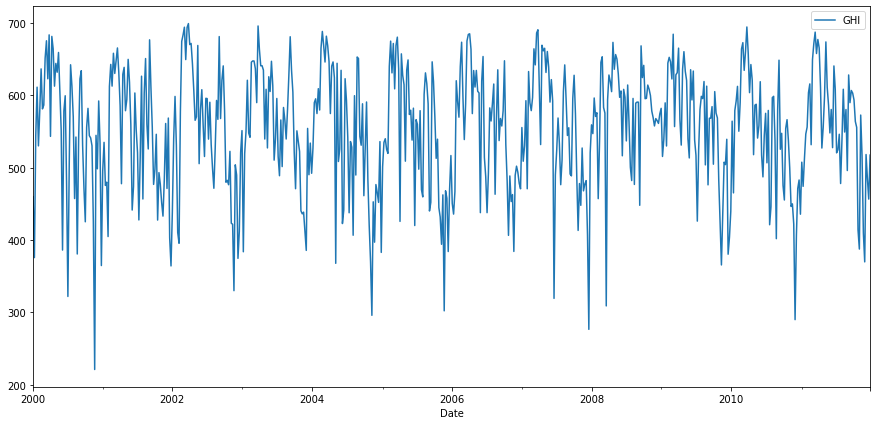

In [13]:
X_train.plot(figsize=(15,7))

In [14]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=7014.584, Time=2.35 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=6800.317, Time=6.63 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=15.70 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=6934.287, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=28.39 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=35.79 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=6866.427, Time=5.44 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=21.00 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=6616.981, Time=25.80 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=6740.837, Time=2.14 sec
 ARIMA(0,1,1)(1,1,1)[52]             : AIC=inf, Time=26.96 sec
 ARIMA(0,1,1)(1,1,0)[52] intercept   : AIC=6618.955, Time=29.50 sec

Best model:  ARIMA(0,1,1)(1,1,0)[52]          
Total fit time: 200.222 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  626
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 52)   Log Likelihood               -3305.490
Date:                             Thu, 29 Apr 2021   AIC                           6616.981
Time:                                     18:54:06   BIC                           6630.034
Sample:                                          0   HQIC                          6622.072
                                             - 626                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9456      0.015    -61.400      0.000      -0.976      -0.915
ar.S.L52      -0.4595      0.035    -13.184      0.000      -0.528      -0.391
sigma2      5855.2314    281.604     20.792      0.000    5303.298    6407.165
===================================================================================
Ljung-Box (L1) (Q):                  18.20   Jarque-Bera (JB):                34.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.29
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [16]:
X_test.shape

(157, 1)

In [17]:
pred=stepwise_model.predict(n_periods=157)

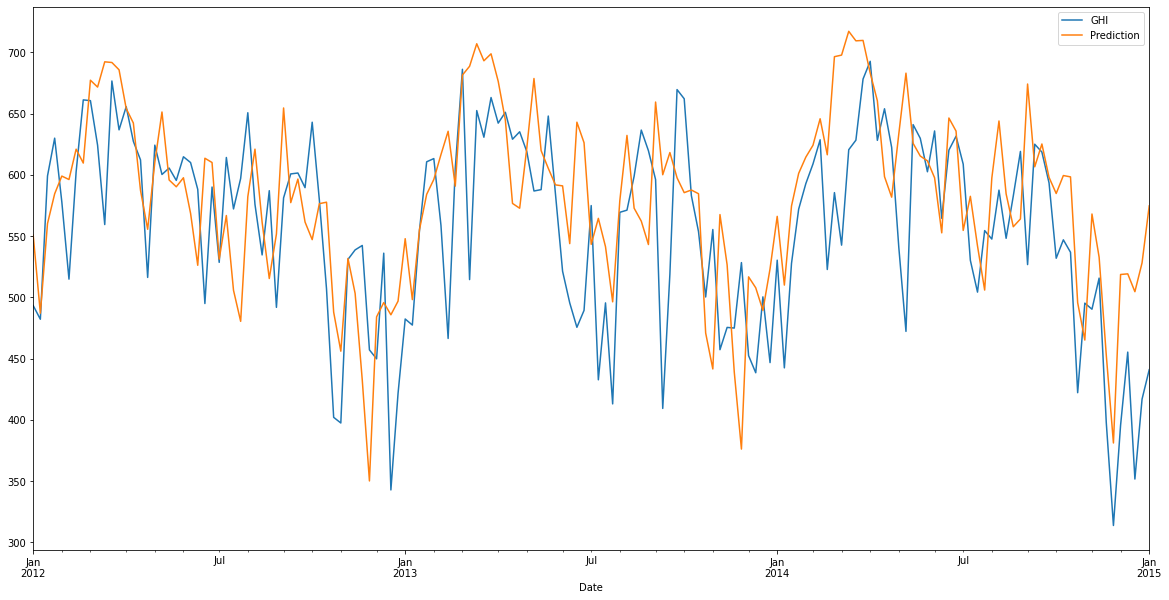

In [18]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

ValueError: ignored

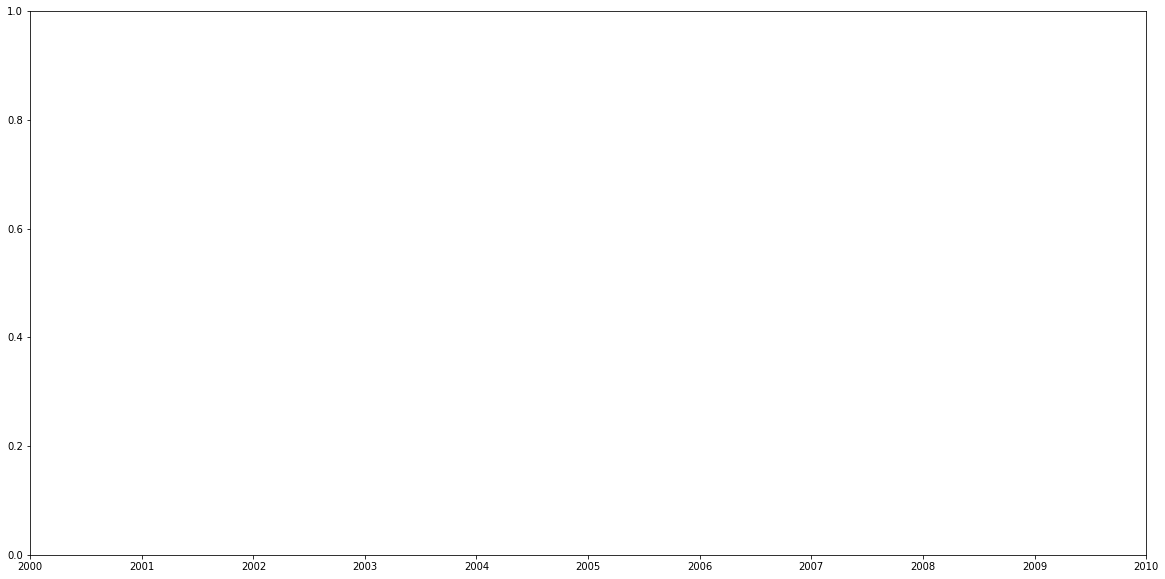

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/MLP_monthly.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTM_monthly.csv')

plt.figure(figsize = (20,10))
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

0.10908879160585096

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)

70.87873822000411

In [ ]:
pred.to_csv('')

,Prediction
Date,
2012-01-06,530.767035
2012-01-13,522.866295
2012-01-20,582.146054
2012-01-27,592.679164
2012-02-03,628.541958
...,...
2014-12-05,496.329418
2014-12-12,503.458449
2014-12-19,542.806504
